In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.model_selection import  train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]
x,y = df_for_train[['Age', 'SibSp', 'Pclass', 'Fare']], df_for_train[['Survived']]
lr = LogisticRegression(random_state=17)
lr.fit(x, y)
print('accuracy', lr.score(x,y))
print('roc_auc', roc_auc_score(lr.predict(x), y))

accuracy 0.691358024691358
roc_auc 0.6776570178029591


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df = pd.read_csv('train.csv')
enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())
gn_df.head()

,x0_,x0_C,x0_Q,x0_S,x1_female,x1_male
0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0


In [6]:
df_.head()

,Embarked,Sex
0,S,male
1,C,female
2,S,female
3,S,female
4,S,male


In [7]:
df = pd.read_csv('train.csv')

enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']
df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x,y = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]
lr = LogisticRegression(random_state=17)
lr.fit(x, y)
print('accuracy', lr.score(x,y))
print('roc_auc', roc_auc_score(lr.predict(x), y))

accuracy 0.7964071856287425
roc_auc 0.798470744680851


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
df_train.head()

,Age,SibSp,Pclass,Fare,Survived,x0_,x0_C,x0_Q,x0_S,x1_female,x1_male,Age_Fare,SibSp_Pclass,Pclass_Fare,SibSp_Age
407,3.0,1,2,18.7500,1,0.0,0.0,0.0,1.0,0.0,1.0,56.250,2,37.5000,3.0
176,0.0,3,3,25.4667,0,0.0,0.0,0.0,1.0,0.0,1.0,0.000,9,76.4001,0.0
816,23.0,0,3,7.9250,0,0.0,0.0,0.0,1.0,1.0,0.0,182.275,0,23.7750,0.0
375,0.0,1,1,82.1708,1,0.0,1.0,0.0,0.0,1.0,0.0,0.000,1,82.1708,0.0
151,22.0,1,1,66.6000,1,0.0,0.0,0.0,1.0,1.0,0.0,1465.200,1,66.6000,22.0


In [100]:
df = pd.read_csv('train.csv')

enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)


df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.15,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','Age_Fare','SibSp_Pclass','Pclass_Fare']],df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','Age_Fare','SibSp_Pclass','Pclass_Fare']],df_test[['Survived']]

tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17)

tree.fit(x_train,y_train)



print('accuracy', tree.score(x_train,y_train))
print('roc_auc', roc_auc_score(tree.predict(x_train), y_train))
print('accuracy', tree.score(x_test,y_test))
print('roc_auc', roc_auc_score(tree.predict(x_test), y_test))

print("accuracy_train",tree.score(x_train,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(x_train)[:,1]))
print("accuracy_test",tree.score(x_test,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(x_test)[:,1]))

accuracy 0.7159841479524438
roc_auc 0.7071482379744974
accuracy 0.7014925373134329
roc_auc 0.7074142156862745
accuracy_train 0.7159841479524438
roc_auc_train 0.7472718253968255
accuracy_test 0.7014925373134329
roc_auc_test 0.6833333333333332


In [54]:
df_for_train2.head()

,Age,SibSp,Pclass,Fare,Survived,x0_,x0_C,x0_Q,x0_S,x1_female,x1_male,Age_Fare,SibSp_Pclass,Pclass_Fare,SibSp_Age
0,22.0,1,3,7.2500,0,0.0,0.0,0.0,1.0,0.0,1.0,159.5000,3,21.7500,22.0
1,38.0,1,1,71.2833,1,0.0,1.0,0.0,0.0,1.0,0.0,2708.7654,1,71.2833,38.0
2,26.0,0,3,7.9250,1,0.0,0.0,0.0,1.0,1.0,0.0,206.0500,0,23.7750,0.0
3,35.0,1,1,53.1000,1,0.0,0.0,0.0,1.0,1.0,0.0,1858.5000,1,53.1000,35.0
4,35.0,0,3,8.0500,0,0.0,0.0,0.0,1.0,0.0,1.0,281.7500,0,24.1500,0.0


accuracy_train 0.7065868263473054
roc_auc_train 0.710066985645933
accuracy_test 0.6905829596412556
roc_auc_test 0.7222452704945236


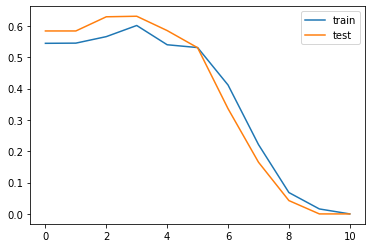

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=17)

lr.fit(x_train,y_train)

print("accuracy_train",lr.score(x_train,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(x_train)[:,1]))
print("accuracy_test",lr.score(x_test,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(x_test)[:,1]))
predict_train = lr.predict_proba(x_train)
predict_test = lr.predict_proba(x_test)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

In [59]:
scaler = preprocessing.Normalizer()
trans_data = scaler.fit_transform(x_train)
# print(trans_data)
lr = LogisticRegression(random_state=17)

lr.fit(trans_data,y_train)
print("accuracy_train",lr.score(trans_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(trans_data)[:,1]))
# print("accuracy_test",lr.score(x_test,y_test))
# print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(x_test)[:,1]))

accuracy_train 0.6221928665785997
roc_auc_train 0.6889880952380952


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Логистическая регрессия с использованием препроцессинга

accuracy_train 0.6901197604790419
roc_auc_train 0.6999712918660286
accuracy_test 0.6636771300448431
roc_auc_test 0.732534019249917


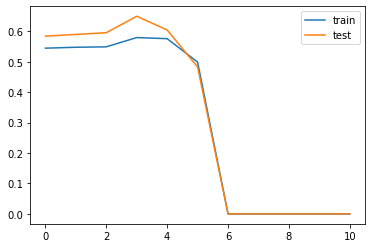

In [73]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.Normalizer()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

lr = LogisticRegression(random_state=17)

lr.fit(train_data,y_train)

print("accuracy_train",lr.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(train_data)[:,1]))
print("accuracy_test",lr.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(test_data)[:,1]))
predict_train = lr.predict_proba(train_data)
predict_test = lr.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.7065868263473054
roc_auc_train 0.7098373205741626
accuracy_test 0.6905829596412556
roc_auc_test 0.7198390308662462


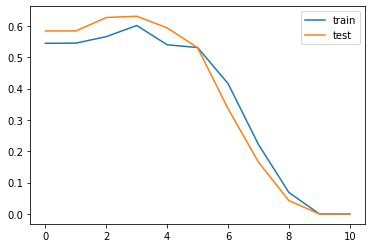

In [62]:
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.StandardScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

lr = LogisticRegression(random_state=17)

lr.fit(train_data,y_train)

print("accuracy_train",lr.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(train_data)[:,1]))
print("accuracy_test",lr.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(test_data)[:,1]))
predict_train = lr.predict_proba(train_data)
predict_test = lr.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.7035928143712575
roc_auc_train 0.7082392344497608
accuracy_test 0.672645739910314
roc_auc_test 0.7142797875871224


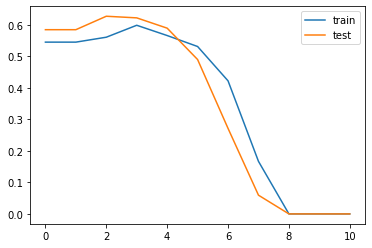

In [63]:
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.MinMaxScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

lr = LogisticRegression(random_state=17)

lr.fit(train_data,y_train)

print("accuracy_train",lr.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(train_data)[:,1]))
print("accuracy_test",lr.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(test_data)[:,1]))
predict_train = lr.predict_proba(train_data)
predict_test = lr.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.7065868263473054
roc_auc_train 0.7090622009569378
accuracy_test 0.6905829596412556
roc_auc_test 0.7215814802522403


C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (223). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


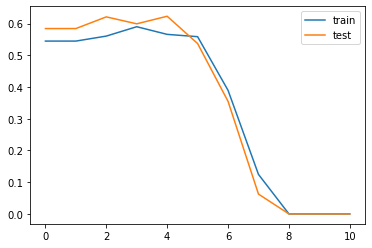

In [64]:
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.QuantileTransformer()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

lr = LogisticRegression(random_state=17)

lr.fit(train_data,y_train)

print("accuracy_train",lr.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(train_data)[:,1]))
print("accuracy_test",lr.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(test_data)[:,1]))
predict_train = lr.predict_proba(train_data)
predict_test = lr.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.7035928143712575
roc_auc_train 0.7076746411483253
accuracy_test 0.6771300448430493
roc_auc_test 0.7195071357451046


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


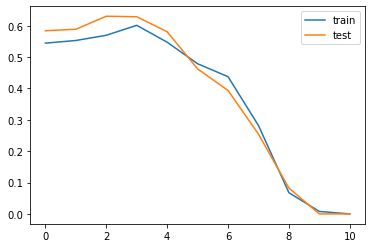

In [65]:
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.PolynomialFeatures(degree=2)
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

lr = LogisticRegression(random_state=17)

lr.fit(train_data,y_train)

print("accuracy_train",lr.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(train_data)[:,1]))
print("accuracy_test",lr.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(test_data)[:,1]))
predict_train = lr.predict_proba(train_data)
predict_test = lr.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

# Дерево решений с использованием препроцессинга

accuracy_train 0.7305389221556886
roc_auc_train 0.7256746411483254
accuracy_test 0.672645739910314
roc_auc_test 0.6758214404248257


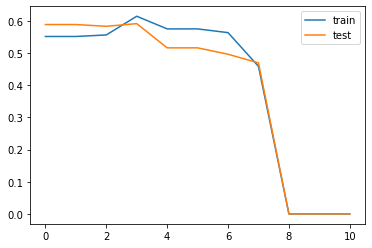

In [88]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.Normalizer()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)


tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17,
                             max_features=4)

tree.fit(train_data,y_train)

print("accuracy_train",tree.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(train_data)[:,1]))
print("accuracy_test",tree.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(test_data)[:,1]))
predict_train = tree.predict_proba(train_data)
predict_test = tree.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.6961077844311377
roc_auc_train 0.7274784688995215
accuracy_test 0.6591928251121076
roc_auc_test 0.6879770992366412


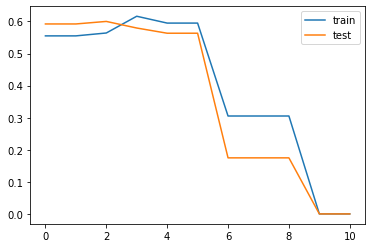

In [87]:
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.StandardScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)


tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17,
                             max_features=4)

tree.fit(train_data,y_train)

print("accuracy_train",tree.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(train_data)[:,1]))
print("accuracy_test",tree.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(test_data)[:,1]))
predict_train = tree.predict_proba(train_data)
predict_test = tree.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.6961077844311377
roc_auc_train 0.7274784688995215
accuracy_test 0.6681614349775785
roc_auc_test 0.6943245934284766


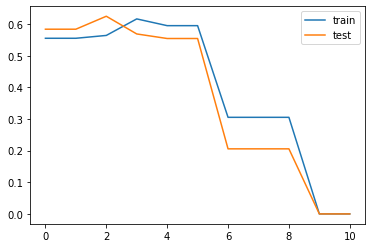

In [91]:
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.MinMaxScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)


tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17,
                             max_features=4)

tree.fit(train_data,y_train)

print("accuracy_train",tree.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(train_data)[:,1]))
print("accuracy_test",tree.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(test_data)[:,1]))
predict_train = tree.predict_proba(train_data)
predict_test = tree.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (223). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


accuracy_train 0.6961077844311377
roc_auc_train 0.7274784688995215
accuracy_test 0.6771300448430493
roc_auc_test 0.6911301028874876


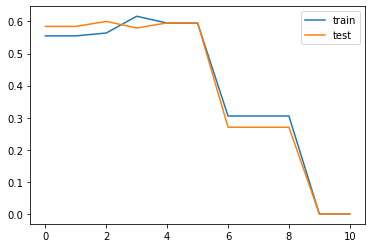

In [69]:
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.QuantileTransformer()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)


tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17)

tree.fit(train_data,y_train)

print("accuracy_train",tree.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(train_data)[:,1]))
print("accuracy_test",tree.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(test_data)[:,1]))
predict_train = tree.predict_proba(train_data)
predict_test = tree.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.7245508982035929
roc_auc_train 0.7560239234449759
accuracy_test 0.6860986547085202
roc_auc_test 0.7073929638234316


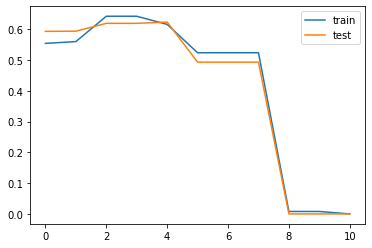

In [70]:
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.PolynomialFeatures(degree=2)
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)


tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17)

tree.fit(train_data,y_train)

print("accuracy_train",tree.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(train_data)[:,1]))
print("accuracy_test",tree.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(test_data)[:,1]))
predict_train = tree.predict_proba(train_data)
predict_test = tree.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

# Логистическая регрессия с использованием препроцессинга и добавление новых стобцов и OneHotEncoder

accuracy_train 0.6302395209580839
roc_auc_train 0.696952153110048
accuracy_test 0.5739910313901345
roc_auc_test 0.7405824759376037


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


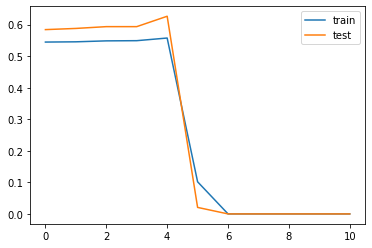

In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')


enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_test[['Survived']]


from sklearn.linear_model import LogisticRegression

scaler = preprocessing.Normalizer()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

lr = LogisticRegression(random_state=17)

lr.fit(train_data,y_train)

print("accuracy_train",lr.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(train_data)[:,1]))
print("accuracy_test",lr.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(test_data)[:,1]))
predict_train = lr.predict_proba(train_data)
predict_test = lr.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.8158682634730539
roc_auc_train 0.8542440191387559
accuracy_test 0.7668161434977578
roc_auc_test 0.8406488549618321


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


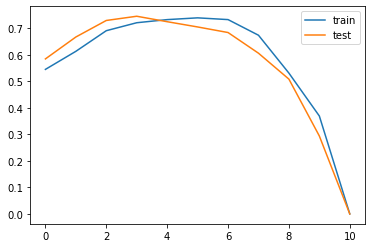

In [78]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')


enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_test[['Survived']]


from sklearn.linear_model import LogisticRegression

scaler = preprocessing.StandardScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

lr = LogisticRegression(random_state=17)

lr.fit(train_data,y_train)

print("accuracy_train",lr.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(train_data)[:,1]))
print("accuracy_test",lr.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(test_data)[:,1]))
predict_train = lr.predict_proba(train_data)
predict_test = lr.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.7964071856287425
roc_auc_train 0.8533732057416268
accuracy_test 0.7713004484304933
roc_auc_test 0.8376617988715566


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


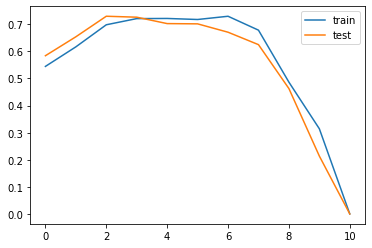

In [97]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')


enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_test[['Survived']]


from sklearn.linear_model import LogisticRegression

scaler = preprocessing.MinMaxScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

lr = LogisticRegression(random_state=17)

lr.fit(train_data,y_train)

print("accuracy_train",lr.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(train_data)[:,1]))
print("accuracy_test",lr.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(test_data)[:,1]))
predict_train = lr.predict_proba(train_data)
predict_test = lr.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (223). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy_train 0.7994011976047904
roc_auc_train 0.8475645933014354
accuracy_test 0.757847533632287
roc_auc_test 0.8278708927978758


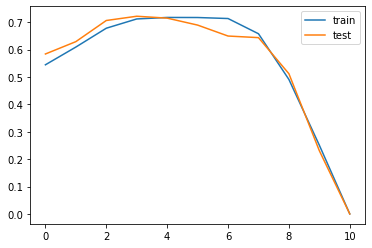

In [80]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')


enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_test[['Survived']]


from sklearn.linear_model import LogisticRegression

scaler = preprocessing.QuantileTransformer()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

lr = LogisticRegression(random_state=17)

lr.fit(train_data,y_train)

print("accuracy_train",lr.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(train_data)[:,1]))
print("accuracy_test",lr.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(test_data)[:,1]))
predict_train = lr.predict_proba(train_data)
predict_test = lr.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_train 0.7080838323353293
roc_auc_train 0.6458516746411483
accuracy_test 0.6816143497757847
roc_auc_test 0.6498091603053434


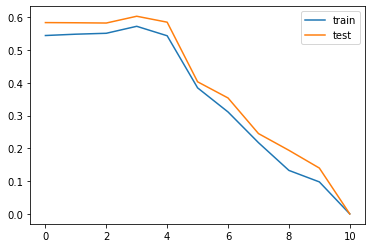

In [81]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')


enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_test[['Survived']]


from sklearn.linear_model import LogisticRegression

scaler = preprocessing.PolynomialFeatures(degree=2)
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

lr = LogisticRegression(random_state=17)

lr.fit(train_data,y_train)

print("accuracy_train",lr.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, lr.predict_proba(train_data)[:,1]))
print("accuracy_test",lr.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,lr.predict_proba(test_data)[:,1]))
predict_train = lr.predict_proba(train_data)
predict_test = lr.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

# Дерево решений с использованием препроцессинга и добавление новых стобцов и OneHotEncoder

accuracy_train 0.8248502994011976
roc_auc_train 0.8561866028708133
accuracy_test 0.7713004484304933
roc_auc_test 0.8222701626286093


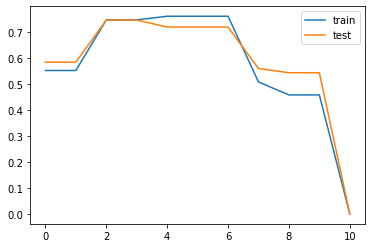

In [82]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')


enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_test[['Survived']]


from sklearn.linear_model import LogisticRegression

scaler = preprocessing.Normalizer()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17)

tree.fit(train_data,y_train)

print("accuracy_train",tree.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(train_data)[:,1]))
print("accuracy_test",tree.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(test_data)[:,1]))
predict_train = tree.predict_proba(train_data)
predict_test = tree.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.8263473053892215
roc_auc_train 0.8551961722488037
accuracy_test 0.7623318385650224
roc_auc_test 0.8057998672419515


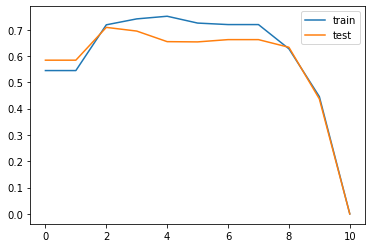

In [83]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')


enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_test[['Survived']]


from sklearn.linear_model import LogisticRegression

scaler = preprocessing.StandardScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17)

tree.fit(train_data,y_train)

print("accuracy_train",tree.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(train_data)[:,1]))
print("accuracy_test",tree.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(test_data)[:,1]))
predict_train = tree.predict_proba(train_data)
predict_test = tree.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.8263473053892215
roc_auc_train 0.8551961722488037
accuracy_test 0.7623318385650224
roc_auc_test 0.8130185861267839


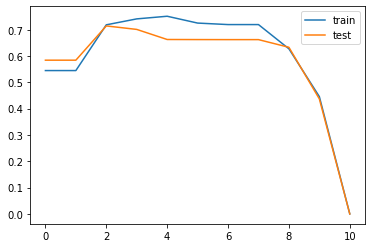

In [96]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')


enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_test[['Survived']]


from sklearn.linear_model import LogisticRegression

scaler = preprocessing.MinMaxScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17)

tree.fit(train_data,y_train)

print("accuracy_train",tree.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(train_data)[:,1]))
print("accuracy_test",tree.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(test_data)[:,1]))
predict_train = tree.predict_proba(train_data)
predict_test = tree.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.8263473053892215
roc_auc_train 0.8551961722488037
accuracy_test 0.7623318385650224
roc_auc_test 0.8049286425489546


C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (223). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


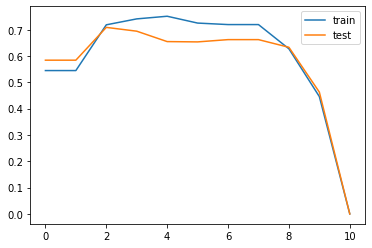

In [98]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')


enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_test[['Survived']]


from sklearn.linear_model import LogisticRegression

scaler = preprocessing.QuantileTransformer()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17)

tree.fit(train_data,y_train)

print("accuracy_train",tree.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(train_data)[:,1]))
print("accuracy_test",tree.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(test_data)[:,1]))
predict_train = tree.predict_proba(train_data)
predict_test = tree.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

accuracy_train 0.8308383233532934
roc_auc_train 0.8592631578947367
accuracy_test 0.7623318385650224
roc_auc_test 0.7997427812811152


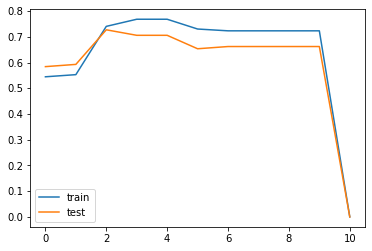

In [99]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
df = pd.read_csv('train.csv')


enc_1 = OneHotEncoder()
df_ = df[['Embarked','Sex']].fillna(' ')
df_.astype('string')
enc_1.fit(df_[['Embarked','Sex']])
states = df_.values[:]
encoded_ds = enc_1.transform(states).toarray()
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())


df_for_train = df.fillna(0)[['Age', 'SibSp', 'Pclass', 'Fare', 'Survived']]

df_for_train2 = pd.concat((df_for_train, gn_df), 
                         axis=1)
df_for_train2['Age_Fare']= df_for_train2['Age']*df_for_train2['Fare']
df_for_train2['SibSp_Pclass']= df_for_train2['SibSp']*df_for_train2['Pclass']
df_for_train2['Pclass_Fare']= df_for_train2['Pclass']*df_for_train2['Fare']
df_for_train2['SibSp_Age']= df_for_train2['SibSp']*df_for_train2['Age']

df_train,df_test = train_test_split(df_for_train2.copy(),test_size=0.25,random_state=17)

x_train,y_train = df_train[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_train[['Survived']]

x_test,y_test = df_test[['Age', 'SibSp', 'Pclass', 'Fare','x0_C','x0_Q','x0_S','x1_female','x1_male','Age_Fare','SibSp_Pclass','Pclass_Fare']], df_test[['Survived']]


from sklearn.linear_model import LogisticRegression

scaler = preprocessing.PolynomialFeatures(degree=2)
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17)

tree.fit(train_data,y_train)

print("accuracy_train",tree.score(train_data,y_train))
print('roc_auc_train',roc_auc_score(y_train, tree.predict_proba(train_data)[:,1]))
print("accuracy_test",tree.score(test_data,y_test))
print('roc_auc_test',roc_auc_score(y_test,tree.predict_proba(test_data)[:,1]))
predict_train = tree.predict_proba(train_data)
predict_test = tree.predict_proba(test_data)

pd.Series([f1_score(y_train, predict_train[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()

pd.Series([f1_score(y_test, predict_test[:,1]>i) 
           for i in np.arange(0,1+0.1,0.1)]).plot()
plt.legend(['train','test'])

In [ ]:
Normalizer:
accuracy_train 0.8248502994011976
roc_auc_train 0.8561866028708133
accuracy_test 0.7713004484304933
roc_auc_test 0.8222701626286093

StandardScaler:
accuracy_train 0.8263473053892215
roc_auc_train 0.8551961722488037
accuracy_test 0.7623318385650224
roc_auc_test 0.8057998672419515

MinMaxScaler:
accuracy_train 0.8263473053892215
roc_auc_train 0.8551961722488037
accuracy_test 0.7623318385650224
roc_auc_test 0.8130185861267839

QuantileTransformer:
accuracy_train 0.8263473053892215
roc_auc_train 0.8551961722488037
accuracy_test 0.7623318385650224
roc_auc_test 0.8049286425489546

PolynomialFeatures:
accuracy_train 0.8308383233532934
roc_auc_train 0.8592631578947367
accuracy_test 0.7623318385650224
roc_auc_test 0.7997427812811152

# Использование GridSeach

In [85]:
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.Normalizer()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17)

tree_params = {'max_depth': range(1,11),
                'max_features': range(4,19),
               'class_weight':[None]}
tree_grid = GridSearchCV(tree, 
                         tree_params,
                        cv=5, n_jobs=-1,
                        verbose=10, 
                         refit = 'f1')
tree_grid.fit(train_data, y_train)
tree_grid.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1986s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0620s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0662s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0632s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 224 t

{'class_weight': None, 'max_depth': 3, 'max_features': 4}

In [89]:
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('train.csv')

df_for_train = df.fillna(0)[['Age','SibSp','Pclass','Fare','Survived']]

x_train,x_test,y_train,y_test = train_test_split(df_for_train[['Age','SibSp','Pclass','Fare']],
                                                 df_for_train['Survived'],
                                                random_state=17)
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.MinMaxScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.fit_transform(x_test)

tree = DecisionTreeClassifier(max_depth = 3, 
                              random_state=17)

tree_params = {'max_depth': range(1,11),
                'max_features': range(4,19),
               'class_weight':[None]}
tree_grid = GridSearchCV(tree, 
                         tree_params,
                        cv=5, n_jobs=-1,
                        verbose=10, 
                         refit = 'f1')
tree_grid.fit(train_data, y_train)
tree_grid.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0240s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0734s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0720s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1086s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1575s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    0.6s
[Parallel(n

{'class_weight': None, 'max_depth': 4, 'max_features': 4}

Можем увидеть, Grid Search нам не нужен тк параметры и так стоят верно

In [ ]:
Лучшие варианты

Логистическая регрессия с использованием препроцессинга

QuantileTransformer:
accuracy_train 0.7065868263473054
roc_auc_train 0.7090622009569378
accuracy_test 0.6905829596412556
roc_auc_test 0.7215814802522403

Дерево решений с использованием препроцессинга

PolynomialFeatures:
accuracy_train 0.7245508982035929
roc_auc_train 0.7560239234449759
accuracy_test 0.6860986547085202
roc_auc_test 0.7073929638234316

Логистическая регрессия с использованием препроцессинга и добавление новых стобцов и OneHotEncoder

StandardScaler:
accuracy_train 0.8158682634730539
roc_auc_train 0.8542440191387559
accuracy_test 0.7668161434977578
roc_auc_test 0.8406488549618321

Дерево решений с использованием препроцессинга и добавление новых стобцов и OneHotEncoder

Normalizer:
accuracy_train 0.8248502994011976
roc_auc_train 0.8561866028708133
accuracy_test 0.7713004484304933
roc_auc_test 0.8222701626286093